In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import statsmodels

from sklearn.model_selection import train_test_split
from statsmodels.formula.api import ols
from statsmodels.othermod import betareg

pd.set_option('max_columns', None)
sns.set_theme(style="ticks")

In [3]:
all_teams_full = pd.read_csv('all_teams_full_cleaned.csv')

In [6]:
all_features = all_teams_full.drop(columns=['TEAM_ID', 'TEAM_NAME', 'YEAR'])

In [7]:
all_features

,WIN_PCT,FG_PCT,REB,AST_TOV_RAT,PTS,OPP_PPG,HOME_WIN_PCT,PLAYOFF,TOP3_PPG,TOP3_P14,OFF_BENCH_PPG,BENCH_P30
0,0.439,0.471,44.5,1.514793,108.6,111.3,0.487805,1,18.032740,1,34.951220,1
1,0.354,0.480,43.2,1.465116,107.8,110.6,0.390244,0,18.894844,1,28.853659,0
2,0.378,0.470,44.8,1.182741,104.4,108.2,0.609756,0,17.705386,1,31.109756,1
3,0.512,0.490,40.3,1.440000,104.5,103.7,0.756098,1,16.714243,1,27.926829,0
4,0.695,0.502,42.8,1.714286,108.8,101.2,0.902439,1,18.791115,1,28.060976,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1105,0.622,0.471,47.8,1.805369,115.2,112.5,0.756098,1,20.830769,1,23.475610,0
1106,0.589,0.468,45.4,1.816901,110.7,108.4,0.885714,1,19.672070,1,37.109756,1
1107,0.681,0.476,45.1,1.645833,113.6,108.1,0.805556,1,20.753404,1,38.341463,1
1108,0.622,0.466,42.3,1.896000,109.9,107.3,0.585366,1,21.757569,1,28.048780,0


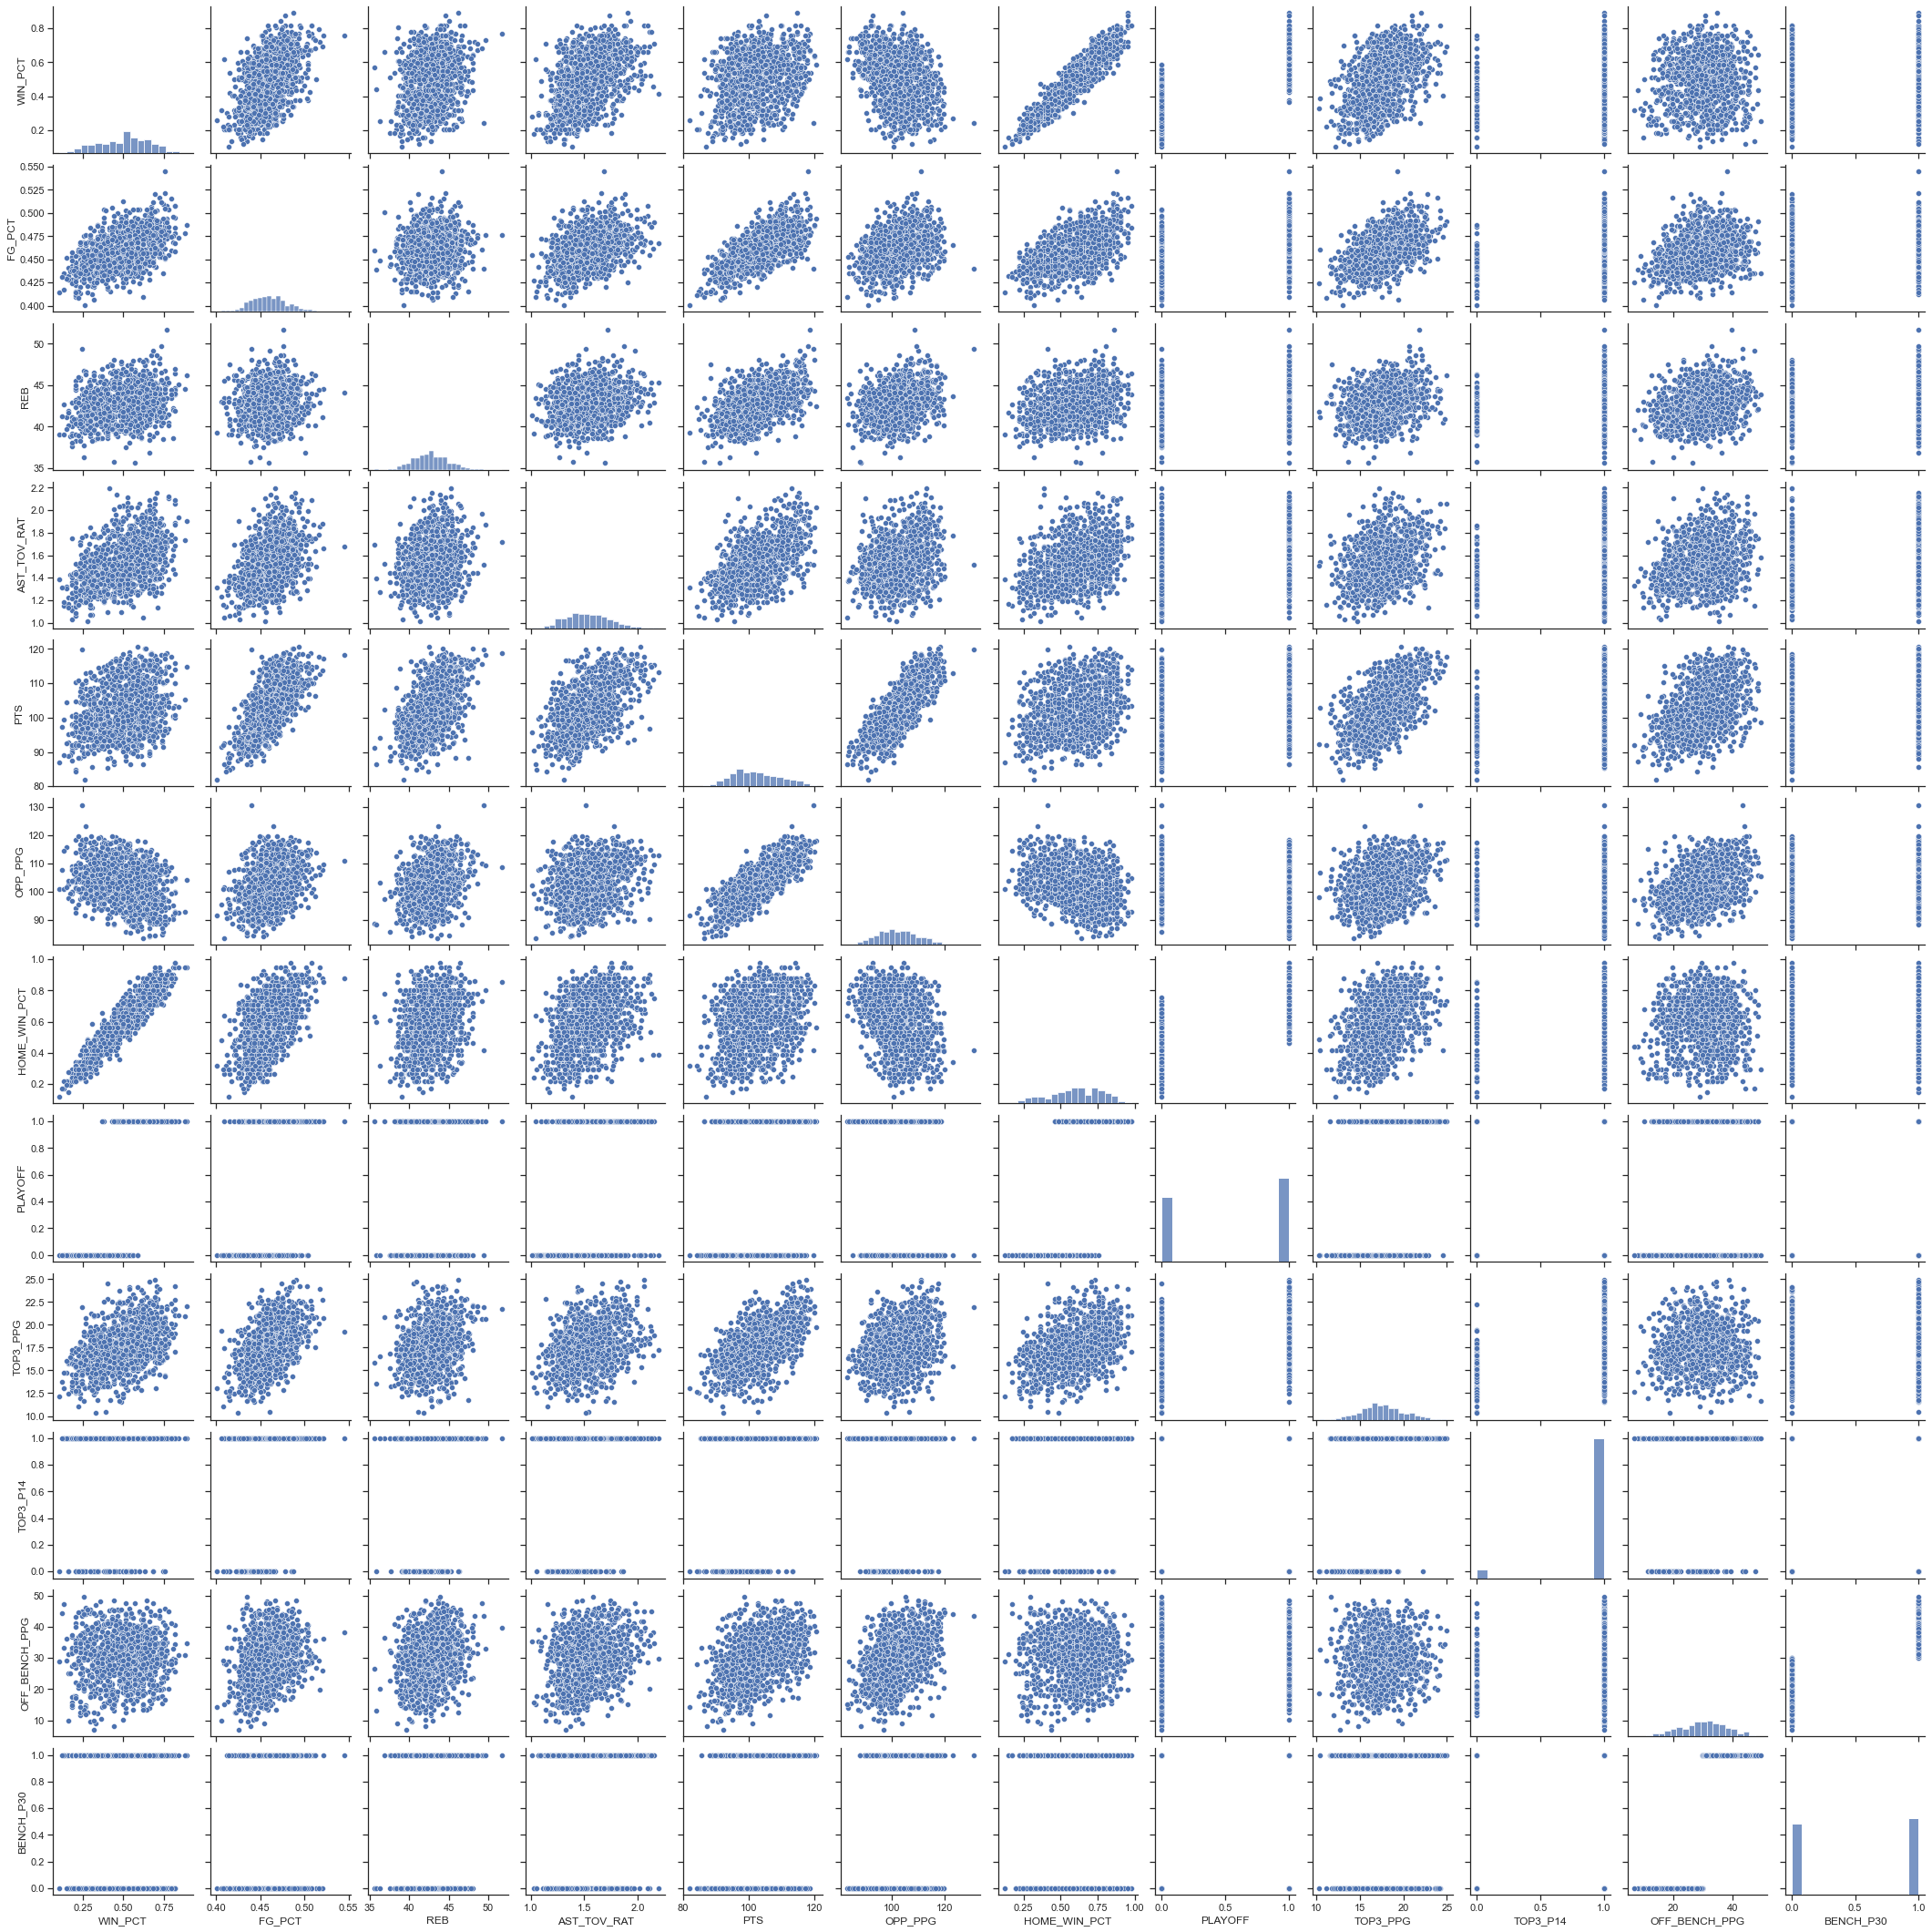

In [8]:
sns.pairplot(all_features)

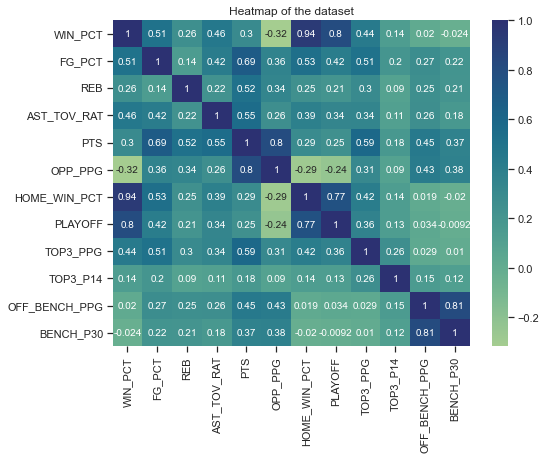

In [9]:
# Create a heatmap to visualize how correlated variables are
plt.figure(figsize=(8, 6))
sns.heatmap(
    all_features.corr(), 
    annot=True, 
    cmap="crest")
plt.title("Heatmap of the dataset")
plt.show()

In [ ]:
test_model_new_features = all_teams_full[['WIN_PCT', 'FG_PCT','REB','AST_TOV_RAT','OPP_PPG', 'TOP3_P14']]

In [ ]:
data_X = test_model_new_features[['FG_PCT','REB','AST_TOV_RAT','OPP_PPG', 'TOP3_P14']]
data_Y = test_model_new_features['WIN_PCT']
X_train, X_test, y_train, y_test = train_test_split(data_X, data_Y, 
                                                    test_size = 0.3, random_state = 42)

In [ ]:
# Write out OLS formula as a string
ols_formula = "WIN_PCT ~ FG_PCT + AST_TOV_RAT + REB + OPP_PPG + C(TOP3_P14)"

# Create OLS dataframe
ols_data = pd.concat([X_train, y_train], axis = 1)

# Create OLS object and fit the model
OLS = ols(formula = ols_formula, data = ols_data)
model = OLS.fit()

# Get model results
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                WIN_PCT   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.769
Method:                 Least Squares   F-statistic:                     518.2
Date:                Fri, 02 Feb 2024   Prob (F-statistic):          1.13e-243
Time:                        14:55:33   Log-Likelihood:                 920.73
No. Observations:                 777   AIC:                            -1829.
Df Residuals:                     771   BIC:                            -1802.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -1.4856      0.077    -19.193      0.000      -1.638      -1.334
C(TOP3_P14)[T.1]     0.0161      0.011      1.412      0.158      -0.006       0.039
FG_PCT               4.5166      0.156     28.913      0.000       4.210       4.823
AST_TOV_RAT          0.2405      0.014     16.675      0.000       0.212       0.269
REB                  0.0265      0.001     19.907      0.000       0.024       0.029
OPP_PPG             -0.0157      0.000    -38.599      0.000      -0.017      -0.015
==============================================================================
Omnibus:                        9.322   Durbin-Watson:                   1.958
Prob(Omnibus):                  0.009   Jarque-Bera (JB):                9.285
Skew:                           0.253   Prob(JB):                      0.00963
Kurtosis:                       3.177   Cond. No.                     6.95e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.95e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""